In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

## Data loading

In [3]:
df = pd.read_csv('..\\data\\Sales_2019_processed.csv')

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

In [5]:
df

,Order ID,Product,Price Each,Date,Time,City,State,Zip Code,Quantity Ordered,Total Price
0,141234,iPhone,700.00,2019-01-22,21:25:00,Boston,MA,2215,1,700.00
1,141235,Lightning Charging Cable,14.95,2019-01-28,14:15:00,Portland,OR,97035,1,14.95
2,141236,Wired Headphones,11.99,2019-01-17,13:33:00,San Francisco,CA,94016,2,23.98
3,141237,27in FHD Monitor,149.99,2019-01-05,20:33:00,Los Angeles,CA,90001,1,149.99
4,141238,Wired Headphones,11.99,2019-01-25,11:59:00,Austin,TX,73301,1,11.99
...,...,...,...,...,...,...,...,...,...,...
185634,319666,Lightning Charging Cable,14.95,2019-12-11,20:58:00,San Francisco,CA,94016,1,14.95
185635,319667,AA Batteries (4-pack),3.84,2019-12-01,12:01:00,Los Angeles,CA,90001,2,7.68
185636,319668,Vareebadd Phone,400.00,2019-12-09,06:43:00,Seattle,WA,98101,1,400.00
185637,319669,Wired Headphones,11.99,2019-12-03,10:39:00,Dallas,TX,75001,1,11.99


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185639 entries, 0 to 185638
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185639 non-null  int64         
 1   Product           185639 non-null  object        
 2   Price Each        185639 non-null  float64       
 3   Date              185639 non-null  datetime64[ns]
 4   Time              185639 non-null  object        
 5   City              185639 non-null  object        
 6   State             185639 non-null  object        
 7   Zip Code          185639 non-null  int64         
 8   Quantity Ordered  185639 non-null  int64         
 9   Total Price       185639 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 14.2+ MB


In [82]:
df.nunique()

Order ID            178437
Product                 19
Price Each              17
Date                   366
Time                  1440
City                     9
State                    8
Zip Code                10
Quantity Ordered         9
Total Price             53
Month                   12
Week_day                 7
Hour                    24
dtype: int64

In [7]:
df.columns

Index(['Order ID', 'Product', 'Price Each', 'Date', 'Time', 'City', 'State',
       'Zip Code', 'Quantity Ordered', 'Total Price'],
      dtype='object')

## Product analysis

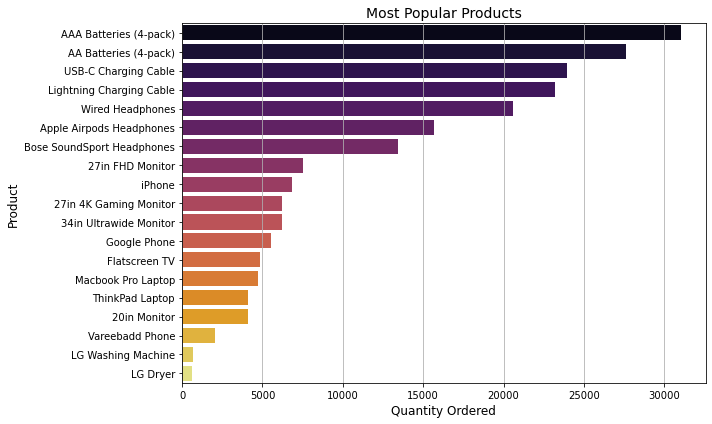

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

In [56]:
Product_count = df.groupby('Product').sum()['Quantity Ordered'].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=Product_count.values, y=Product_count.index, palette='inferno')

plt.title("Most Popular Products", fontsize=14)
plt.xlabel("Quantity Ordered", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.grid(axis='x')

plt.tight_layout()
plt.savefig('..\\reports\\figures\\Most Popular Products.png', bbox_inches='tight', dpi=300, facecolor='white') 
plt.show()
Product_count

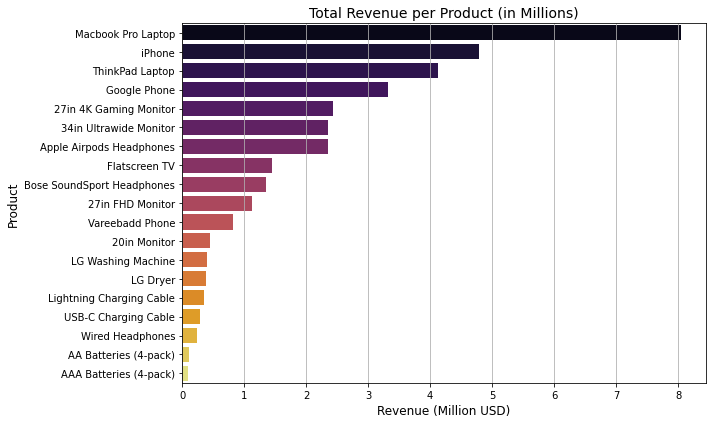

Product
Macbook Pro Laptop            8.037600
iPhone                        4.794300
ThinkPad Laptop               4.129959
Google Phone                  3.319200
27in 4K Gaming Monitor        2.435098
34in Ultrawide Monitor        2.355558
Apple Airpods Headphones      2.349150
Flatscreen TV                 1.445700
Bose SoundSport Headphones    1.345565
27in FHD Monitor              1.132424
Vareebadd Phone               0.827200
20in Monitor                  0.454149
LG Washing Machine            0.399600
LG Dryer                      0.387600
Lightning Charging Cable      0.347094
USB-C Charging Cable          0.286501
Wired Headphones              0.246478
AA Batteries (4-pack)         0.106118
AAA Batteries (4-pack)        0.092741
Name: Total Price, dtype: float64

In [57]:
Product_price_sum_mln = df.groupby('Product').sum()['Total Price'].sort_values(ascending=False) / 10**6

plt.figure(figsize=(10,6))
sns.barplot(x=Product_price_sum_mln.values, y=Product_price_sum_mln.index, palette='inferno')

plt.title("Total Revenue per Product (in Millions)", fontsize=14)
plt.xlabel("Revenue (Million USD)", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.grid(axis='x')

plt.tight_layout()
plt.savefig('..\\reports\\figures\\Total Revenue per Product.png', bbox_inches='tight', dpi=300, facecolor='white') 
plt.show()
Product_price_sum_mln

In [58]:
Product_mean_price = df.groupby('Product').mean()['Price Each']
Product_mean_price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [59]:
merged_data = pd.DataFrame({
    'Product_mean_price': Product_mean_price,
    'Product_count': Product_count,
})
merged_data

,Product_mean_price,Product_count
Product,,
20in Monitor,109.99,4129
27in 4K Gaming Monitor,389.99,6244
27in FHD Monitor,149.99,7550
34in Ultrawide Monitor,379.99,6199
AA Batteries (4-pack),3.84,27635
AAA Batteries (4-pack),2.99,31017
Apple Airpods Headphones,150.00,15661
Bose SoundSport Headphones,99.99,13457
Flatscreen TV,300.00,4819


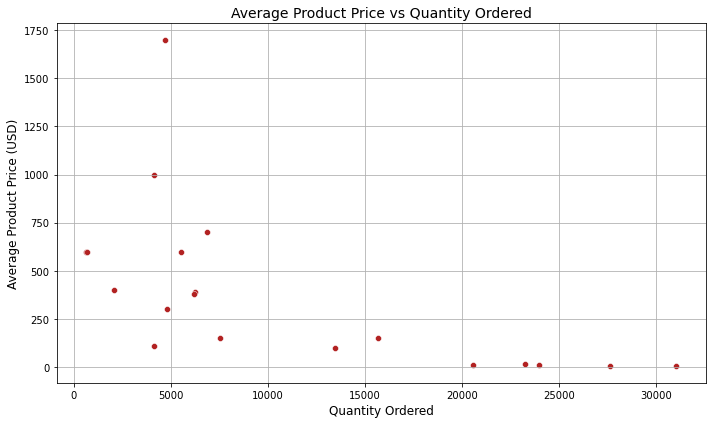

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_data, x='Product_count', y='Product_mean_price', color='firebrick')

plt.title("Average Product Price vs Quantity Ordered", fontsize=14)
plt.xlabel("Quantity Ordered", fontsize=12)
plt.ylabel("Average Product Price (USD)", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.savefig('..\\reports\\figures\\Average Product Price vs Quantity Ordered.png', bbox_inches='tight', dpi=300, facecolor='white') 
plt.show()


In [61]:
# average basket
basket_stats = df.groupby('Order ID').agg({
    'Quantity Ordered': 'sum',
    'Total Price': 'sum'
})
basket_stats.mean()

Quantity Ordered      1.171724
Total Price         193.300918
dtype: float64

## Time analysis

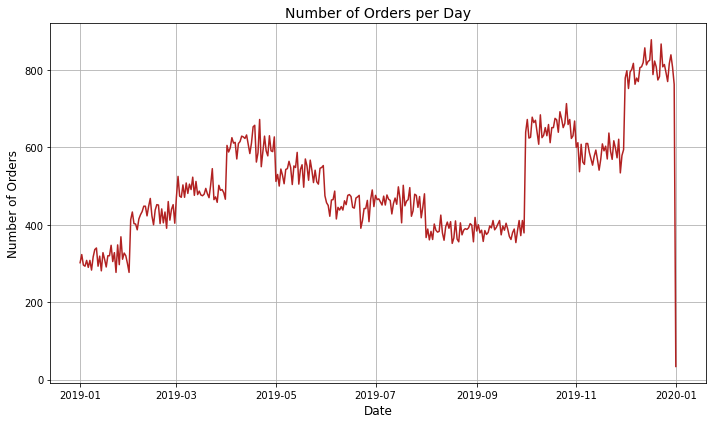

In [62]:
orders_per_day = df.groupby('Date').count()['Order ID']

plt.figure(figsize=(10,6))
sns.lineplot(x=orders_per_day.index, y=orders_per_day.values, color='firebrick')

plt.title("Number of Orders per Day", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.savefig('..\\reports\\figures\\Number of Orders per Day.png', bbox_inches='tight', dpi=300, facecolor='white') 
plt.show()


In [63]:
df['Month'] = df['Date'].dt.month

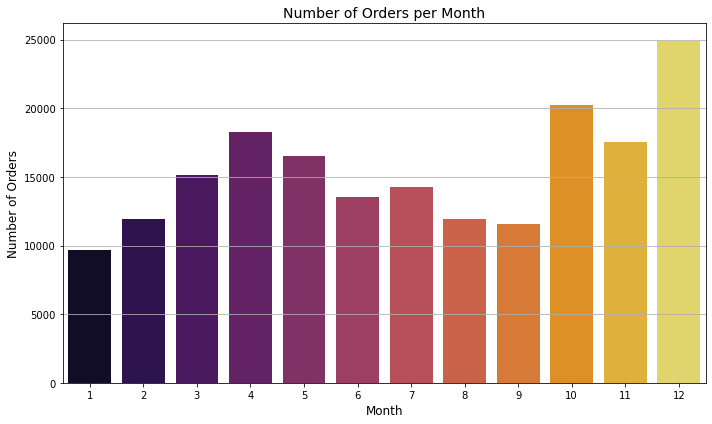

Month
1      9699
2     11953
3     15125
4     18254
5     16544
6     13533
7     14273
8     11938
9     11602
10    20243
11    17540
12    24935
Name: Order ID, dtype: int64

In [64]:
orders_per_month = df.groupby('Month').count()['Order ID']

plt.figure(figsize=(10,6))
sns.barplot(x=orders_per_month.index, y=orders_per_month.values, palette='inferno')

plt.title("Number of Orders per Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid(axis='y')

plt.tight_layout()
plt.savefig('..\\reports\\figures\\Number of Orders per Month.png', bbox_inches='tight', dpi=300, facecolor='white') 
plt.show()
orders_per_month


In [65]:
df['Week_day'] = df['Date'].dt.weekday

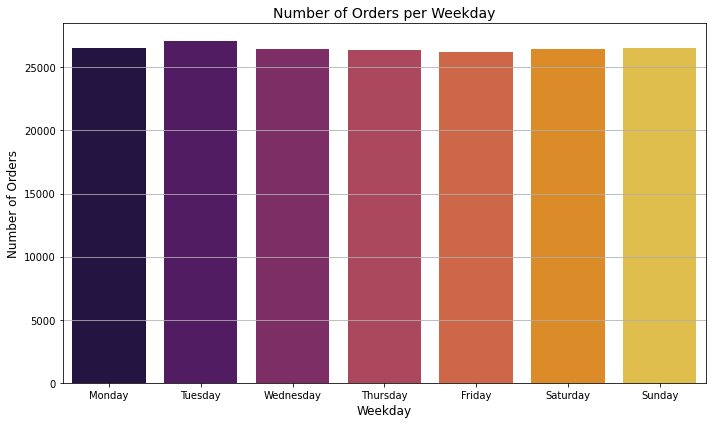

Week_day
0    26503
1    27128
2    26430
3    26408
4    26211
5    26448
6    26511
Name: Order ID, dtype: int64

In [84]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

orders_per_week_day = df.groupby('Week_day').count()['Order ID']

plt.figure(figsize=(10,6))
sns.barplot(x=orders_per_week_day.index, y=orders_per_week_day.values, palette='inferno')

plt.xticks(ticks=range(7), labels=weekdays)

plt.title("Number of Orders per Weekday", fontsize=14)
plt.xlabel("Weekday", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid(axis='y')

plt.tight_layout()
plt.savefig('..\\reports\\figures\\Number of Orders per Weekday.png', bbox_inches='tight', dpi=300, facecolor='white') 
plt.show()
orders_per_week_day


In [67]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)

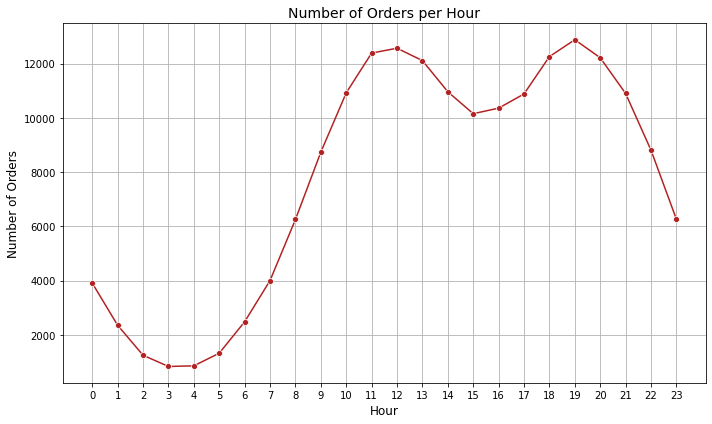

Hour
0      3902
1      2347
2      1242
3       829
4       852
5      1319
6      2479
7      4000
8      6252
9      8737
10    10924
11    12390
12    12569
13    12112
14    10963
15    10154
16    10358
17    10882
18    12260
19    12882
20    12218
21    10901
22     8807
23     6260
Name: Order ID, dtype: int64

In [68]:
orders_per_hour = df.groupby('Hour').count()['Order ID']

plt.figure(figsize=(10,6))
sns.lineplot(x=orders_per_hour.index, y=orders_per_hour.values, marker='o', color='firebrick')

plt.xticks(ticks=range(24), labels=[i for i in range(24)])
plt.title("Number of Orders per Hour", fontsize=14)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.savefig('..\\reports\\figures\\Number of Orders per Hour.png', bbox_inches='tight', dpi=300, facecolor='white') 
plt.show()
orders_per_hour


## Geographical analysis

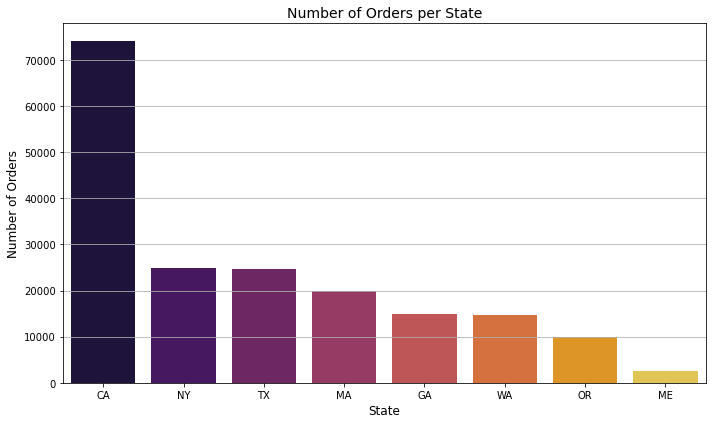

State
CA    74211
NY    24840
TX    24679
MA    19895
GA    14861
WA    14709
OR     9994
ME     2450
Name: Order ID, dtype: int64

In [69]:
orders_per_state = df.groupby('State').count()['Order ID'].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=orders_per_state.index, y=orders_per_state.values, palette='inferno')

plt.title("Number of Orders per State", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid(axis='y')

plt.tight_layout()
plt.savefig('..\\reports\\figures\\Number of Orders per State.png', bbox_inches='tight', dpi=300, facecolor='white') 
plt.show()
orders_per_state


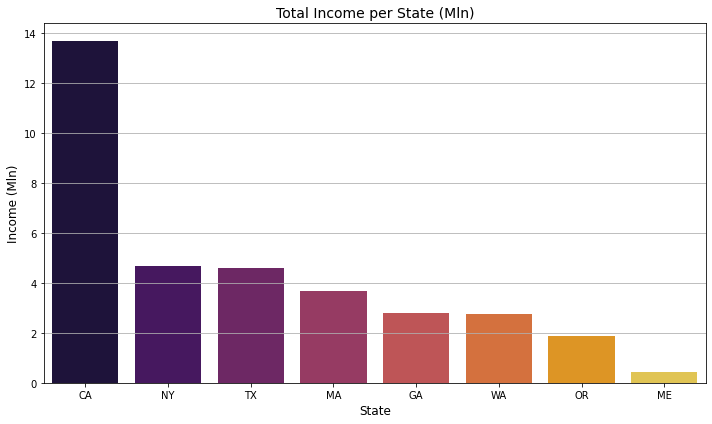

State
CA    13.714775
NY     4.664317
TX     4.587557
MA     3.661642
GA     2.795499
WA     2.747755
OR     1.870732
ME     0.449758
Name: Total Price, dtype: float64

In [70]:
income_per_state = df.groupby('State').sum()['Total Price'].sort_values(ascending=False) / 10**6

plt.figure(figsize=(10,6))
sns.barplot(x=income_per_state.index, y=income_per_state.values, palette='inferno')

plt.title("Total Income per State (Mln)", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Income (Mln)", fontsize=12)
plt.grid(axis='y')

plt.tight_layout()
plt.savefig('..\\reports\\figures\\Total Income per State.png', bbox_inches='tight', dpi=300, facecolor='white') 
plt.show()
income_per_state


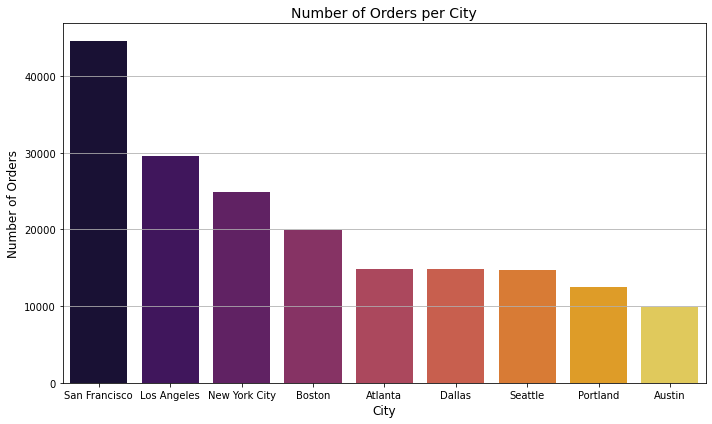

City
San Francisco    44651
Los Angeles      29560
New York City    24840
Boston           19895
Atlanta          14861
Dallas           14792
Seattle          14709
Portland         12444
Austin            9887
Name: Order ID, dtype: int64

In [71]:
orders_per_city = df.groupby('City').count()['Order ID'].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=orders_per_city.index, y=orders_per_city.values, palette='inferno')

plt.title("Number of Orders per City", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid(axis='y')

plt.tight_layout()
plt.savefig('..\\reports\\figures\\Number of Orders per City.png', bbox_inches='tight', dpi=300, facecolor='white') 
plt.show()
orders_per_city


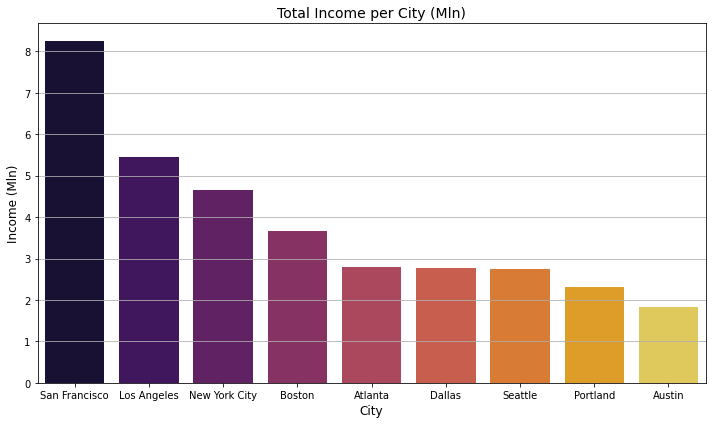

City
San Francisco    8.262204
Los Angeles      5.452571
New York City    4.664317
Boston           3.661642
Atlanta          2.795499
Dallas           2.767975
Seattle          2.747755
Portland         2.320491
Austin           1.819582
Name: Total Price, dtype: float64

In [72]:
income_per_city = df.groupby('City').sum()['Total Price'].sort_values(ascending=False) / 10**6

plt.figure(figsize=(10,6))
sns.barplot(x=income_per_city.index, y=income_per_city.values, palette='inferno')

plt.title("Total Income per City (Mln)", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Income (Mln)", fontsize=12)
plt.grid(axis='y')

plt.tight_layout()
plt.savefig('..\\reports\\figures\\Total Income per City.png', bbox_inches='tight', dpi=300, facecolor='white') 
plt.show()
income_per_city


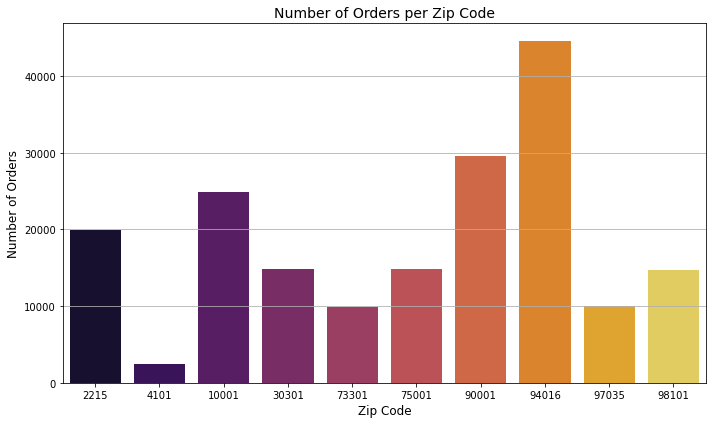

Zip Code
2215     19895
4101      2450
10001    24840
30301    14861
73301     9887
75001    14792
90001    29560
94016    44651
97035     9994
98101    14709
Name: Order ID, dtype: int64

In [73]:
orders_per_zip_code = df.groupby('Zip Code').count()['Order ID']

plt.figure(figsize=(10,6))
sns.barplot(x=orders_per_zip_code.index, y=orders_per_zip_code.values, palette='inferno')

plt.title("Number of Orders per Zip Code", fontsize=14)
plt.xlabel("Zip Code", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid(axis='y')

plt.tight_layout()
plt.savefig('..\\reports\\figures\\Number of Orders per Zip Code.png', bbox_inches='tight', dpi=300, facecolor='white') 
plt.show()
orders_per_zip_code


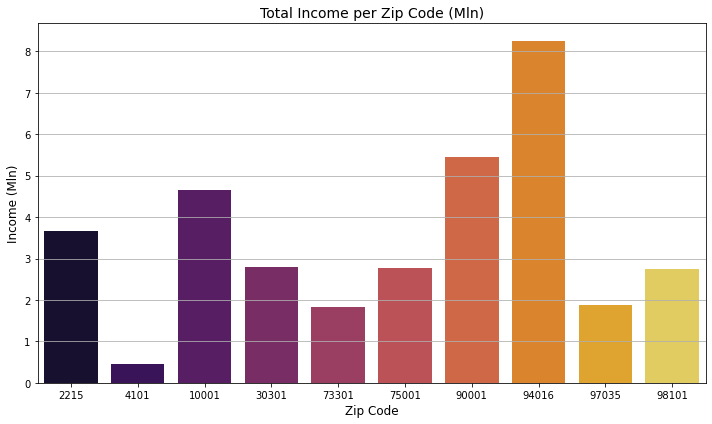

Zip Code
94016    8.262204
90001    5.452571
10001    4.664317
2215     3.661642
30301    2.795499
75001    2.767975
98101    2.747755
97035    1.870732
73301    1.819582
4101     0.449758
Name: Total Price, dtype: float64

In [74]:
income_per_zip_code = df.groupby('Zip Code').sum()['Total Price'].sort_values(ascending=False) / 10**6

plt.figure(figsize=(10,6))
sns.barplot(x=income_per_zip_code.index, y=income_per_zip_code.values, palette='inferno')

plt.title("Total Income per Zip Code (Mln)", fontsize=14)
plt.xlabel("Zip Code", fontsize=12)
plt.ylabel("Income (Mln)", fontsize=12)
plt.grid(axis='y')

plt.tight_layout()
plt.savefig('..\\reports\\figures\\Total Income per Zip Code.png', bbox_inches='tight', dpi=300, facecolor='white') 
plt.show()
income_per_zip_code


## additional analyses

In [75]:
df.groupby('Order ID').count()['Product'].reset_index().groupby('Product').count()

,Order ID
Product,
1,171605
2,6479
3,337
4,15
5,1


In [76]:
from itertools import permutations

In [77]:
def get_product_pairs(order_df):
    return list(permutations(order_df['Product'], 2))

pairs = df.groupby('Order ID').apply(get_product_pairs)

pairs_flat = [pair for sublist in pairs for pair in sublist]
pairs_df = pd.DataFrame(pairs_flat, columns=['Product 1', 'Product 2'])

pair_counts = pairs_df.groupby(['Product 1', 'Product 2']).size().unstack(fill_value=0)

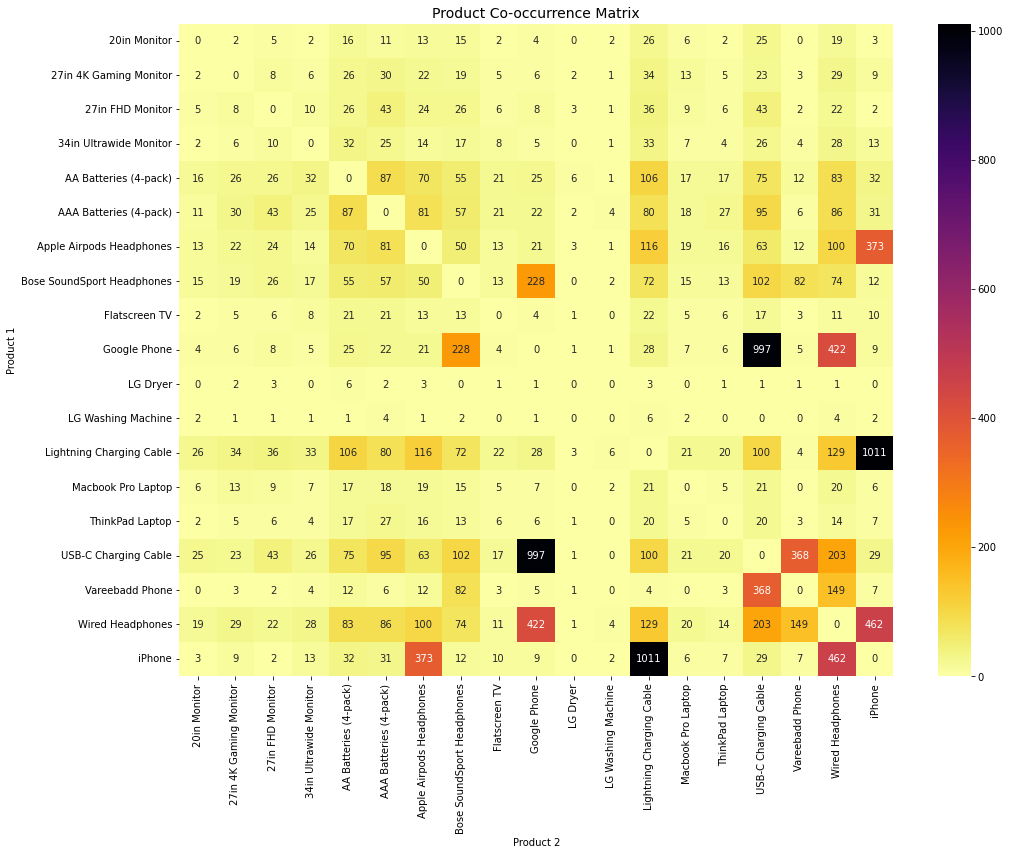

In [78]:
plt.figure(figsize=(16, 12))
sns.heatmap(pair_counts, annot=True, cmap='inferno_r', fmt='d')
plt.title('Product Co-occurrence Matrix', fontsize=14)
plt.savefig('..\\reports\\figures\\Product Co-occurrence Matrix.png', bbox_inches='tight', dpi=300, facecolor='white') 
plt.show()


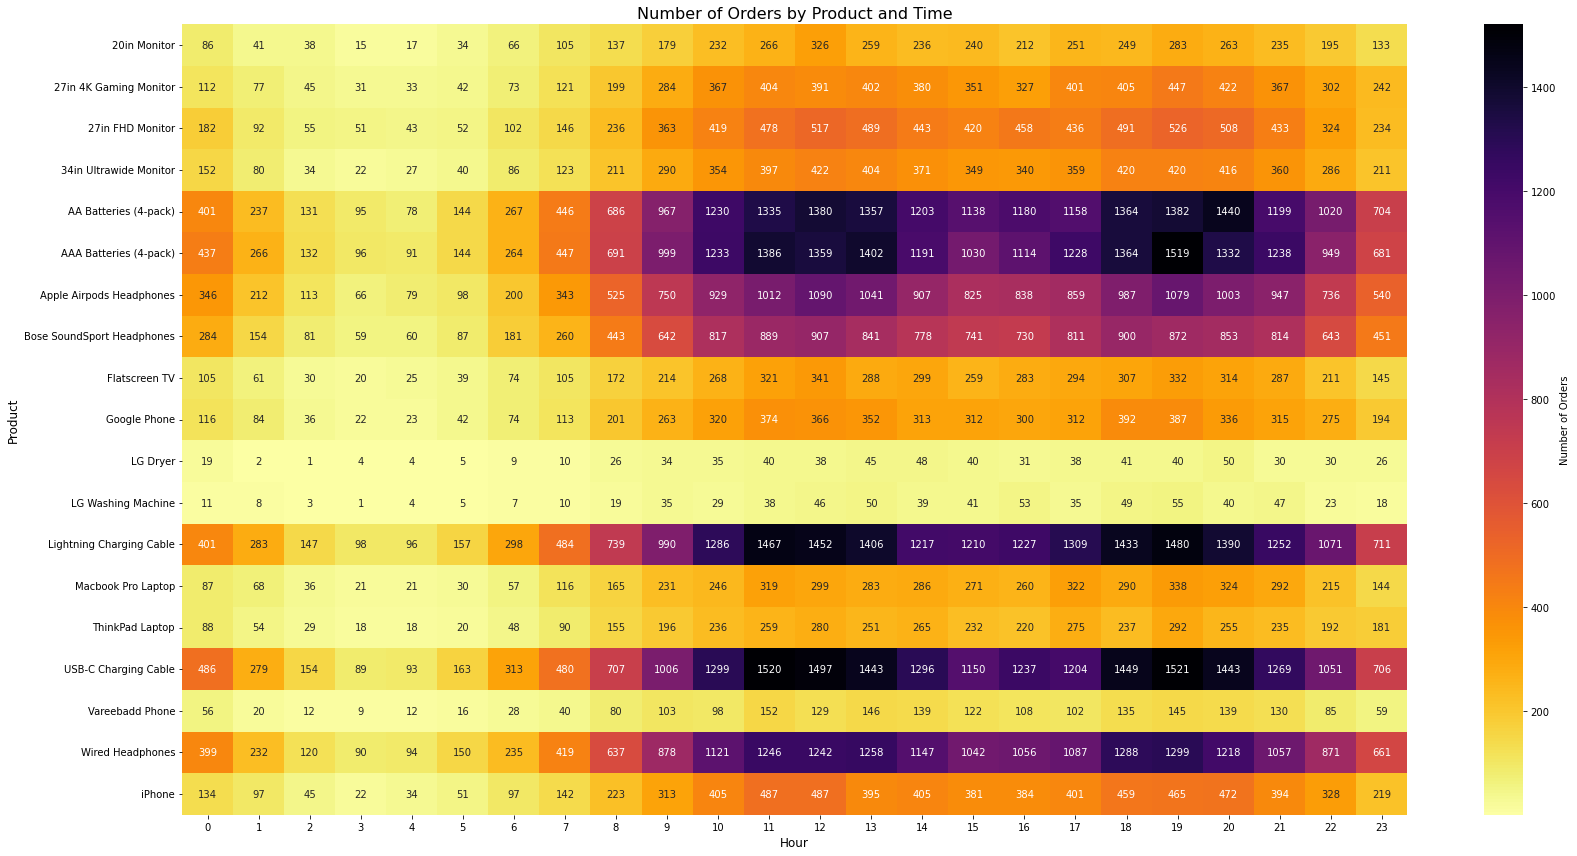

In [79]:
pivot_product_hour = df.groupby(['Product', 'Hour']).size().unstack()

plt.figure(figsize=(24, 12))
sns.heatmap(pivot_product_hour, cmap='inferno_r', annot=True, fmt="d", cbar_kws={'label': 'Number of Orders'})

plt.title('Number of Orders by Product and Time', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Product', fontsize=12)

plt.tight_layout()
plt.savefig('..\\reports\\figures\\Number of Orders by Product and Time.png', bbox_inches='tight', dpi=300, facecolor='white') 
plt.show()


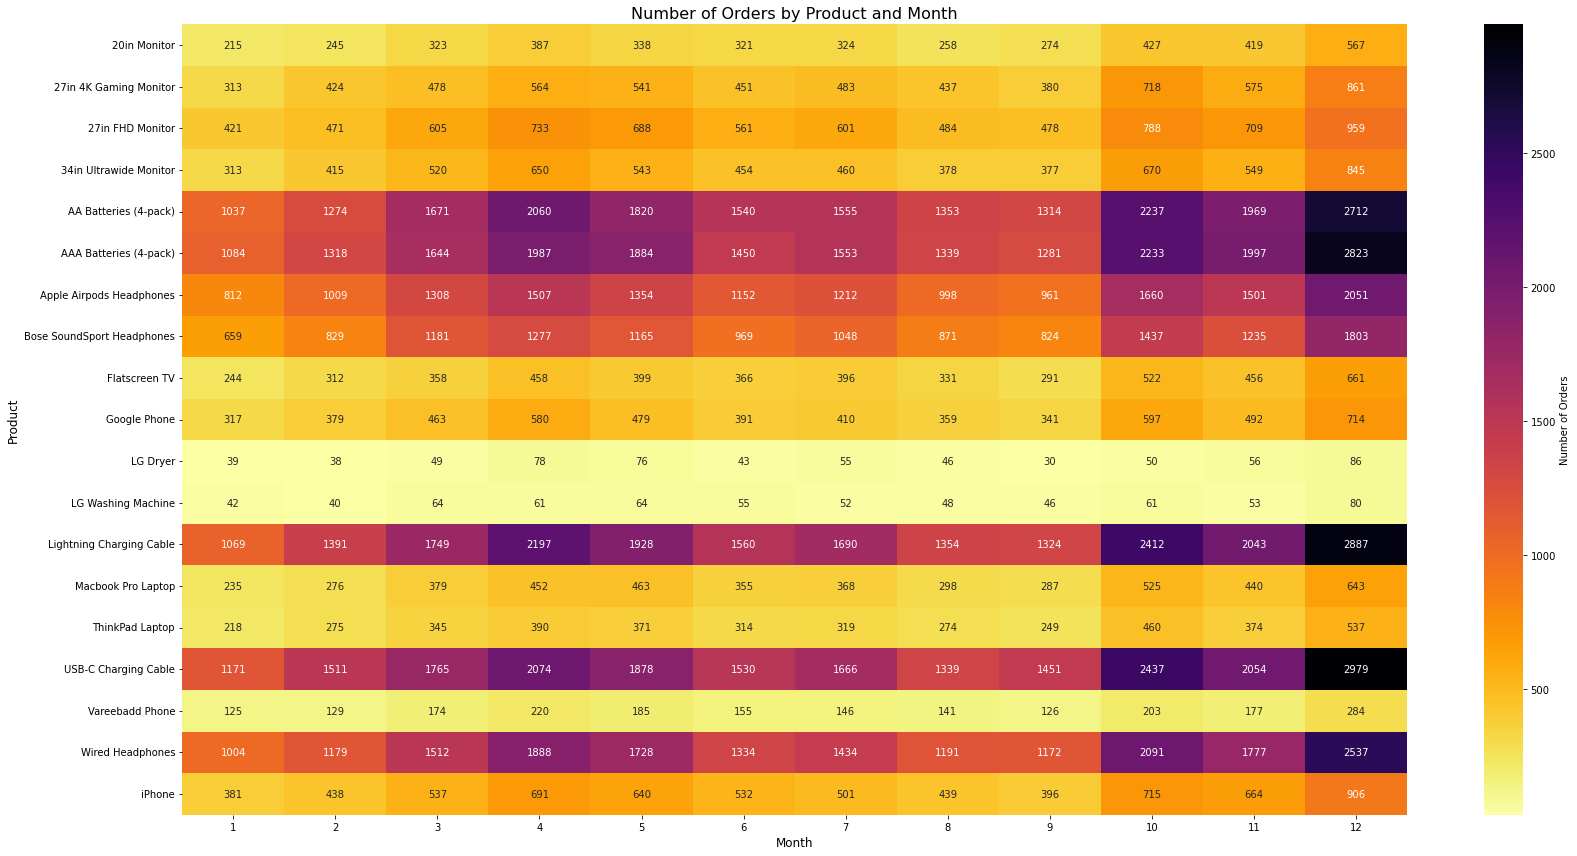

In [80]:
pivot_product_month = df.groupby(['Product', 'Month']).size().unstack()

plt.figure(figsize=(24, 12))
sns.heatmap(pivot_product_month, cmap='inferno_r', annot=True, fmt="d", cbar_kws={'label': 'Number of Orders'})

plt.title('Number of Orders by Product and Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Product', fontsize=12)

plt.tight_layout()
plt.savefig('..\\reports\\figures\\Number of Orders by Product and Month.png', bbox_inches='tight', dpi=300, facecolor='white') 
plt.show()


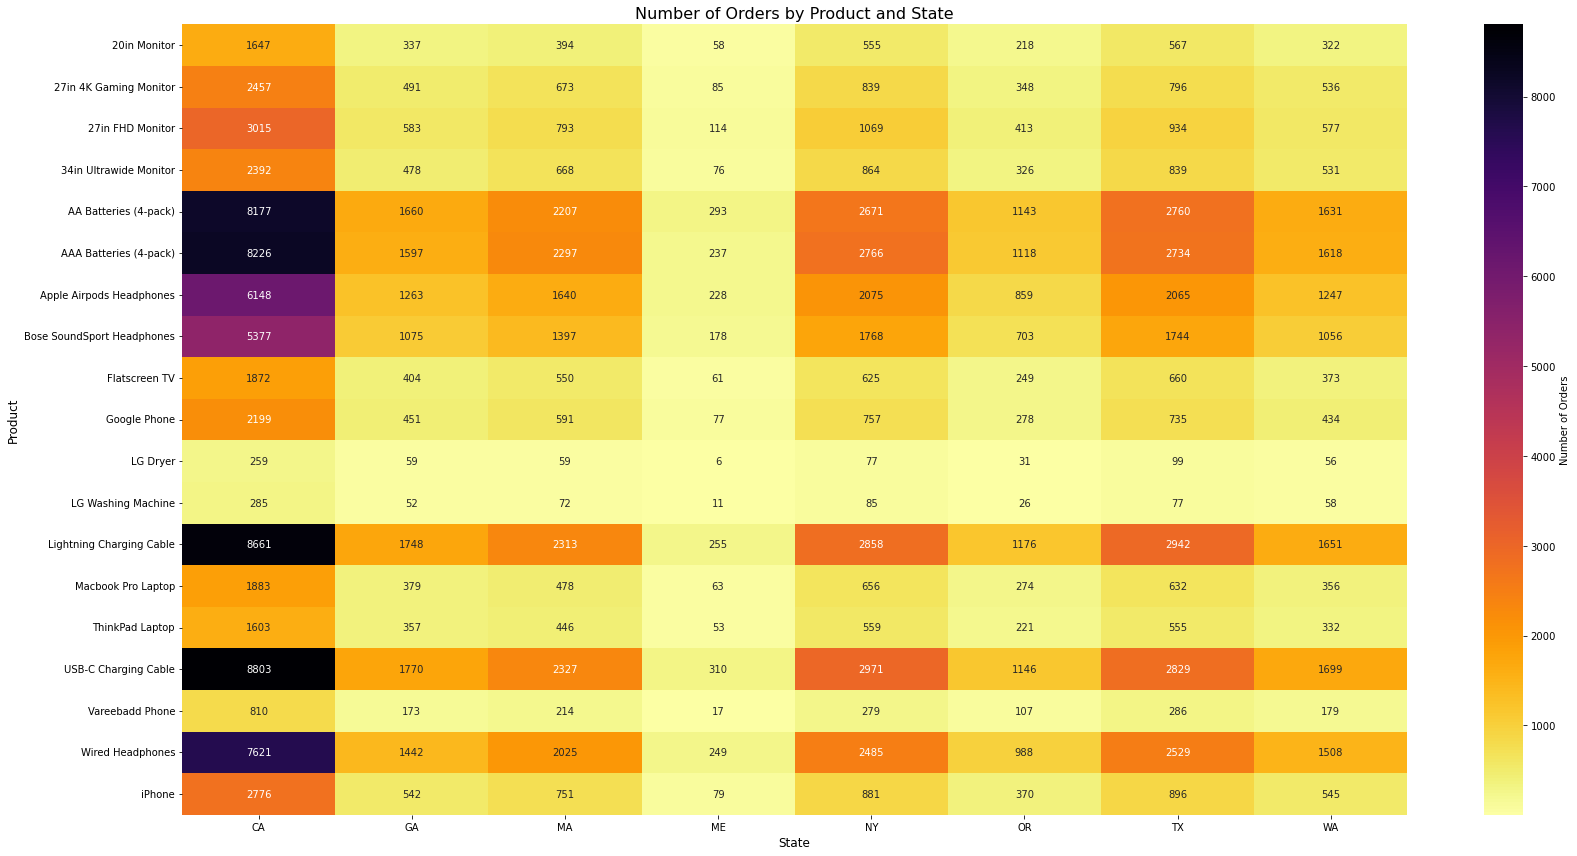

In [81]:
pivot_product_state = df.groupby(['Product', 'State']).size().unstack()

plt.figure(figsize=(24, 12))
sns.heatmap(pivot_product_state, cmap='inferno_r', annot=True, fmt="d", cbar_kws={'label': 'Number of Orders'})

plt.title('Number of Orders by Product and State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Product', fontsize=12)

plt.tight_layout()
plt.savefig('..\\reports\\figures\\Number of Orders by Product and State.png', bbox_inches='tight', dpi=300, facecolor='white') 
plt.show()
